In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


import ipynb.fs.full.bond_metadata as bond
import ipynb.fs.full.curve_fitting as curve

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

matplotlib.use('Agg')
plt.style.use('default')



_labelAlignmentArray = [1, 2, 4, 8, 16, 32, 64, 128]
_minMovingDistance = 1
_maxMovingDistance = 3
clrs = ['blue', 'orange', 'red', 'green', 'black', 'purple', 'brown', 'yellow', 'gray', 'darkgreen', 'darkblue', 'darkred']
_chart_area = {}
curves = {}
sizeMarker = pd.DataFrame()

def _moveUp(y, h, d):
    y += d/1.75
    y += h
    return y

def _moveDown(y, h, d):
    y -= d/1.75
    y -= h
    return y

def _moveRight(x, w, d):
    x += d/1.75
    x += w/1.75
    return x

def _moveLeft(x, w, d):
    x -= d/1.75
    x -= w/1.75
    return x

def calculatePosition(align_array, a, x, y, x1, x2, y1, y2, h, w, step):
    #NOTE: keep the order to keep coordinate count

    d = sizeMarker['d'][0]
    for i in range(step):
        if align_array == 1: #top
            if a == 128:
                y = _moveUp(y, h, d)
                y = _moveUp(y, h, d)
                y1 = _moveUp(y1, h, d)
                y1 = _moveUp(y1, h, d)   
                y2 = _moveUp(y2, h, d)
                y2 = _moveUp(y2, h, d)                   
                x = _moveRight(x, w, d)
                x1 = _moveRight(x1, w, d)
                x2 = _moveRight(x2, w, d)                
                a = 1
            else:
                y = _moveUp(y, h, d)
                y1 = _moveUp(y1, h, d)
                y2 = _moveUp(y2, h, d)
            break
        elif align_array == 2: #bottom
            y = _moveDown(y, h, d)
            y = _moveDown(y, h, d)
            y1 = _moveDown(y1, h, d)
            y1 = _moveDown(y1, h, d)
            y2 = _moveDown(y2, h, d)
            y2 = _moveDown(y2, h, d)            
        elif align_array == 4: #right
            y = _moveUp(y, h, d)
            x = _moveRight(x, w, d)
            y1 = _moveUp(y1, h, d)
            x1 = _moveRight(x1, w, d)
            y2 = _moveUp(y2, h, d)
            x2 = _moveRight(x2, w, d)
        elif align_array == 8: #left
            x = _moveLeft(x, w, d)
            x = _moveLeft(x, w, d)
            x1 = _moveLeft(x1, w, d)
            x1 = _moveLeft(x1, w, d)
            x2 = _moveLeft(x2, w, d)
            x2 = _moveLeft(x2, w, d)            
        elif align_array == 16: #top-right
            y = _moveUp(y, h, d)
            y1 = _moveUp(y1, h, d)
            y2 = _moveUp(y2, h, d)
            x = _moveRight(x, w, d)
            x = _moveRight(x, w, d)
            x1 = _moveRight(x1, w, d)
            x1 = _moveRight(x1, w, d)
            x2 = _moveRight(x2, w, d)
            x2 = _moveRight(x2, w, d)
        elif align_array == 32: #bottom-right
            y = _moveDown(y, h, d)
            y = _moveDown(y, h, d)
            y1 = _moveDown(y1, h, d)
            y1 = _moveDown(y1, h, d)
            y2 = _moveDown(y2, h, d)
            y2 = _moveDown(y2, h, d)            
        elif align_array == 64: #top-left
            y = _moveUp(y, h, d)
            y = _moveUp(y, h, d)
            y1 = _moveUp(y1, h, d)
            y1 = _moveUp(y1, h, d)
            y2 = _moveUp(y2, h, d)
            y2 = _moveUp(y2, h, d)            
            x = _moveLeft(x, w, d)
            x = _moveLeft(x, w, d)
            x1 = _moveLeft(x1, w, d)
            x1 = _moveLeft(x1, w, d)
            x2 = _moveLeft(x2, w, d)
            x2 = _moveLeft(x2, w, d)            
        elif align_array == 128: #bottom-left
            y = _moveDown(y, h, d)
            y = _moveDown(y, h, d)
            y1 = _moveDown(y1, h, d)
            y1 = _moveDown(y1, h, d) 
            y2 = _moveDown(y2, h, d)
            y2 = _moveDown(y2, h, d)             

    a = align_array
    l = step > 1
           
    return x, y, x1, x2, y1, y2, l, a


def place_labels(labels, xy):
    x = labels['x'].values.tolist()
    y = labels['y'].values.tolist()
    x1 = labels['x1'].values.tolist()
    x2 = labels['x2'].values.tolist()
    y1 = labels['y1'].values.tolist()
    y2 = labels['y2'].values.tolist()
    w = labels['width'].values.tolist()
    h = labels['height'].values.tolist()   
    v = labels['visible'].values.tolist()
    a = labels['alignment'].values.tolist()
    l = labels['line'].values.tolist()
    s = labels['step'].values.tolist()
    pt_x = xy[0]
    pt_y = xy[1]
    
    for i in range(len(pt_x)):
        step = 1
        min_r = _minMovingDistance
        max_r = _maxMovingDistance
        increment = 2
        curr_r = 1
        flag = True        
               
        while curr_r <= max_r and flag:
            for align in _labelAlignmentArray:
                s[i] = step
                x[i], y[i], x1[i], x2[i], y1[i], y2[i], l[i], a[i] = calculatePosition(align, a[i], x[i], y[i], x1[i], x2[i], y1[i], y2[i], h[i], w[i], step)
                if (not isLabelCollide(i, x, y, x1, x2, y1, y2, w, h, v, pt_x, pt_y)):
                    flag = False
                    break
            
            curr_r += increment
            step += 1
            
        v[i] = not flag
        
    labels['x'] = x1
    labels['y'] = y2
    labels['x1'] = x1
    labels['x2'] = x2
    labels['y1'] = y1
    labels['y2'] = y2
    labels['visible'] = v
    labels['alignment'] = a
    labels['line'] = l
    labels['step'] = s
    
    return labels

def isLabelCollide(i, x, y, x1, x2, y1, y2, w, h, v, pt_x, pt_y):
    ret = False
    v[i] = True
    if (x2[i] > _chart_area['right']) or y1[i] > _chart_area['top'] or x1[i] < _chart_area['left']  or y2[i] < _chart_area['bottom'] or pt_x[i] > _chart_area['right'] or pt_y[i] > _chart_area['top'] or pt_x[i] < _chart_area['left']  or pt_y[i] < _chart_area['bottom']:
        ret = True
    else:
        r = sizeMarker['r'][0]
        for _i in range(len(x)):
            if _i != i: 
                # check overlap with other labels
                first = [x1[i], x2[i], y1[i], y2[i], v[i]]
                second = [x1[_i], x2[_i], y1[_i], y2[_i], v[_i]]
                if isOverlap(first, second):
                    ret = True
                    break
                
                # check lines intersection
                first = [x1[i], x2[i], y1[i], y2[i], v[i]]
                first_anch = [pt_x[i] - r, pt_x[i] + r, pt_y[i] + r, pt_y[i] - r, True]
                second = [x1[_i], x2[_i], y1[_i], y2[_i], v[_i]]
                second_anch = [pt_x[_i] - r, pt_x[_i] + r, pt_y[_i] + r, pt_y[_i] - r, True]
                if isIntersect(first, first_anch, second, second_anch):
                    ret = True
                    break
            
            #check overlaps with points
            first = [x1[i], x2[i], y1[i], y2[i], v[i]]
            anch = [pt_x[_i] - r, pt_x[_i] + r, pt_y[_i] + r, pt_y[_i] - r, True]
            if isOverlap(first, anch):
                ret = True
                break
    return ret

def isIntersect(label1, anchor1, label2, anchor2):
    if not label1[4] or not label2[4]:
        return False
    return intersect(anchor1[0], label1[0], anchor2[0], label2[1], anchor1[3], label1[3], anchor2[3], label2[2])

def intersect(x1, x2, x3, x4, y1, y2, y3, y4):
    d = (y3 - y4) * (x2 - x1) - (x4 - x3) * (y1 - y2)
    n1 = (x4 - x3) * (y3 - y1) - (y3 - y4) * (x1 - x3)
    n2 = (x2 - x1) * (y3 - y1) - (y1 - y2) * (x1 - x3)
    # Is the intersection along the segments
    m1 = n1 / d
    m2 = n2 / d
    res = not(m1 < 0 or m1 > 1 or m2 < 0 or m2 > 1)
    return res

def isOverlap(first, second):
    if not first[4] or not second[4]:
        return False
    x11 = first[0] #left
    y11 = first[2] #top
    x12 = first[1] #right
    y12 = first[3] #bottom
    x21 = second[0] #left
    y21 = second[2] #top
    x22 = second[1] #right
    y22 = second[3] #bottom
    x_overlap = max(0, min(x12, x22) - max(x11, x21))
    y_overlap = max(0, min(y11, y21) - max(y12, y22))
    #if items doesn't overlap by x or y, their mult. will be zero
    result = (x_overlap * y_overlap) > 1e-10
    return result

def name_builder(df):
    tickers = list(map(lambda x: x.split(' ')[0]+' ', df['description'].values.tolist()))
    coupons = list(map(lambda x: str(x*100)[:6]+' ' if x != 0 else ' ', df['coupon'].values.tolist()))
    maturity = list(map(lambda x: perp_check(x), df['maturity'].values.tolist()))
    currency = df['currency'].values.tolist()
    names = list(map(lambda t, c, m, cu: t+c+m+cu, tickers, coupons, maturity, currency))
    return names

def perp_check(m):
    if m == '':
        m = 'Perp '
    else:
        m = '\'{} '.format(m.split('-')[0][2:])
    return m

def get_data(rics, width = 15, height = 15, enable_fitting = True, debug=False, save_image = False):
    global _chart_area
    global sizeMarker
    global curves
    fit = curve.create
    get_data = bond.get_data
    metadata = get_data(rics, '')
    metadata = metadata.sort_values(by = ['tenor'])
    metadata = metadata.reset_index(drop = True)
    metadata['name'] = name_builder(metadata)
    pids = list(metadata['issuer_permid'].unique())
    b_dict = {}
    c_dict = {}
    crvobj = {}
    legend = {}

    for i in pids:
        b_dict[i] = metadata.loc[(metadata['issuer_permid'] == i) & (metadata['bond_type'] == 'FRB') & ((metadata['seniority'] == 'UN') | (metadata['seniority'] == 'SR')) & (metadata['callable'] != 'Y') & (metadata['putable'] != 'Y') & (metadata['sinkable'] != 'Y') & (metadata['tenor'] > 0.5)]
        b_dict[i] = b_dict[i].reset_index(drop = True)
        if len(b_dict[i]) > 2:
            c_dict[i] = [b_dict[i]['tenor'], b_dict[i]['yield']]
            crvobj[i] = fit(list(c_dict[i][0]), list(c_dict[i][1]), max(list(c_dict[i][0]))) if enable_fitting else [list(c_dict[i][0]), list(c_dict[i][1])]
            legend[i] = str(b_dict[i]['description'][0]).split(' ')[0]+' curve'
    curves = b_dict      
    fig, ax = plt.subplots(constrained_layout=True)
    fig.set_figwidth(width)
    fig.set_figheight(height)
    plt.scatter(list(metadata['tenor']), list(metadata['yield']*100))
    for i, co in enumerate(crvobj.keys()):    
        plt.plot(list(crvobj[co][0]), list(np.multiply(crvobj[co][1], 100)), label=legend[co], color = clrs[i])
    
    #annotation here    
    xy = [list(metadata['tenor']), list(metadata['yield']*100)]
    ymin, ymax = plt.ylim()
    xmin, xmax = plt.xlim()
    lbl = pd.DataFrame()
    sizeMarker = pd.DataFrame()
    lbl['text'] = metadata['name'].values.tolist()
    lbl['x'] = 0.0
    lbl['y'] = 0.0
    lbl['alignment'] = 0
    lbl['visible'] = True
    lbl['x1'] = 0.0
    lbl['x2'] = 0.0
    lbl['y1'] = 0.0
    lbl['y2'] = 0.0
    lbl['width'] = 0.0
    lbl['height'] = 0.0
    lbl['line'] = False
    lbl['step'] = 1
    ann = []
    x = []
    y = []
    x1 = []
    x2 = []
    y1 = []
    y2 = []
    w = []
    h = []
    plt.grid(color='lightgray' , linestyle='--', linewidth=0.5)
    for i in range(len(lbl)):
        #get label dimensions
        ann.append(ax.annotate(lbl['text'][i], (xy[0][i], xy[1][i]), xytext=(lbl['x'][i], lbl['y'][i]), textcoords='offset pixels'))

    fig.canvas.draw()

    #get sixeMarker dimensions (8 px to data coordinates)
    cbox = ([[0, 0], [3, 3]])
    marker_xy = ax.transData.inverted().transform(cbox)
    sizeMarker['d'] = [(list(marker_xy[1])[0] - list(marker_xy[0])[0])]
    sizeMarker['r'] = [(list(marker_xy[1])[0] - list(marker_xy[0])[0])/2]
    
    for i in range(len(lbl)):
        _ann = ann[i]
        bbox = matplotlib.text.Text.get_window_extent(_ann)
        tcbox = ax.transData.inverted().transform(bbox)
        box = [list(tcbox[0]), list(tcbox[1])]
        _w = (box[1][0] - box[0][0])*1.02
        w.append(_w)
        _h = (box[1][1] - box[0][1])*1.02
        h.append(_h)
        _ann.remove()
        #set initial lable position
        x.append(xy[0][i] - _w/2)
        y.append(xy[1][i] - _h/2.5) #center and lower a bit
        x1.append(x[i])
        y1.append(y[i] + _h)  
        x2.append(x1[i] + _w)
        y2.append(y[i])


    lbl['x'] = x
    lbl['y'] = y
    lbl['x1'] = x1
    lbl['x2'] = x2
    lbl['y1'] = y1
    lbl['y2'] = y2
    lbl['width'] = w
    lbl['height'] = h

    #--------------------------
    _chart_area = {'bottom':ymin, 'left':xmin, 'top':ymax, 'right':xmax}
    #--------------------------    
    lbl = place_labels(lbl, xy)
    for i in range(len(lbl)):
        prps = None
        if lbl['line'][i]:
            if lbl['alignment'][i] in [4, 16, 32]:
                prps = dict(arrowstyle = '-', color = 'gray', connectionstyle = 'arc, angleB = 45, armB=0, angleA = 180, armA = 100')
            elif lbl['alignment'][i] in [8, 64, 128]:
                prps = dict(arrowstyle = '-', color = 'gray', connectionstyle = 'arc, angleB = 225, armB=0, angleA = 0, armA = 100')
            else:
                prps = dict(arrowstyle = '-', color = 'gray')

        ax.annotate(lbl['text'][i], (xy[0][i], xy[1][i]), xytext=(lbl['x'][i], lbl['y'][i]), visible=lbl['visible'][i], textcoords='data', arrowprops=prps)
    
    
    
    plt.ylabel('Yield, %')
    plt.xlabel('Tenor, yrs')
    l, h = plt.ylim()
    if h >= 0 and l <= 0:
        plt.axhline(y = 0, linewidth=1, color = 'black')
    plt.legend(loc='upper left')

    res = lbl if debug else None
    plt.plot(bbox_inches='tight')
    
    if save_image:
        plt.savefig('ymap_chart.png')
    plt.show()
    return res

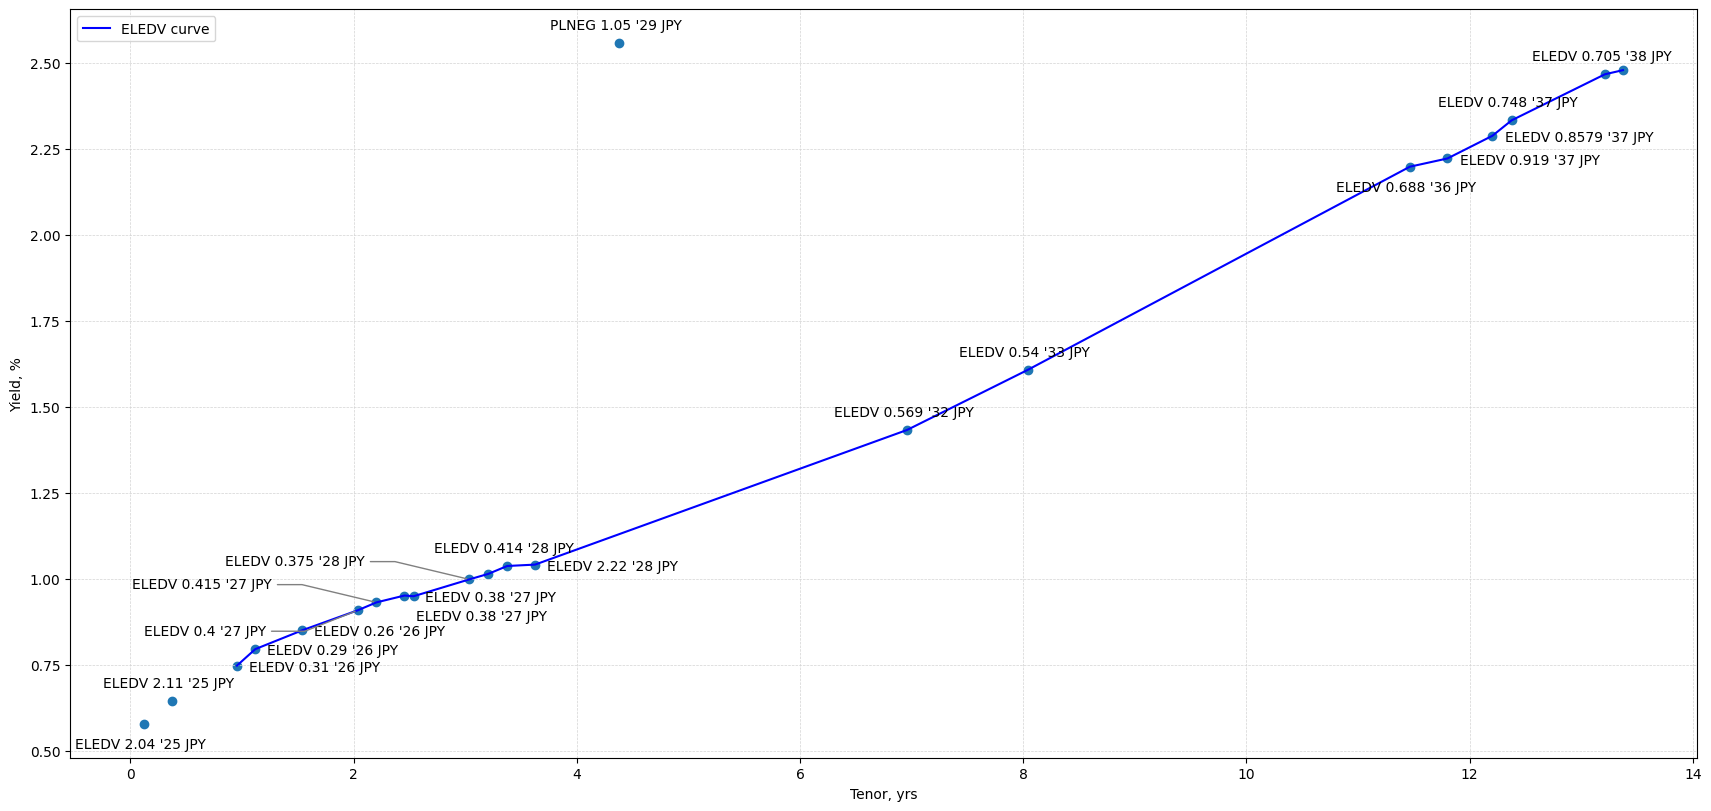

In [2]:
%matplotlib inline
jp_electric_port = [
    'JP00309513=','JP00319513=','JP00329513=','JP00339513=','JP00379513=','JP10010524=',
    'JP00359513=','JP00039513=','JP00389513=','JP00469513=','JP00399513=','JP00409513=',
    'JP00419513=','JP00059513=','JP10020524=','JP00089513=','JP00119513=','JP00139513=',
    'JP00159513=','JP00429513=','JP00439513=','JP00459513=','JP00499513=','JP00509513=',
    'JP00539513=','JP00549513=','JP00559513=','JP00579513=','JP00599513=','JP00269513=',
    'JP10040524=','JP00489513=','JP00569513=','JP00449513=','JP00479513=','JP00519513=',
    'JP00529513=','JP00589513=','JP00609513=']
 
get_data(jp_electric_port, height = 8, width = 17, enable_fitting = False)

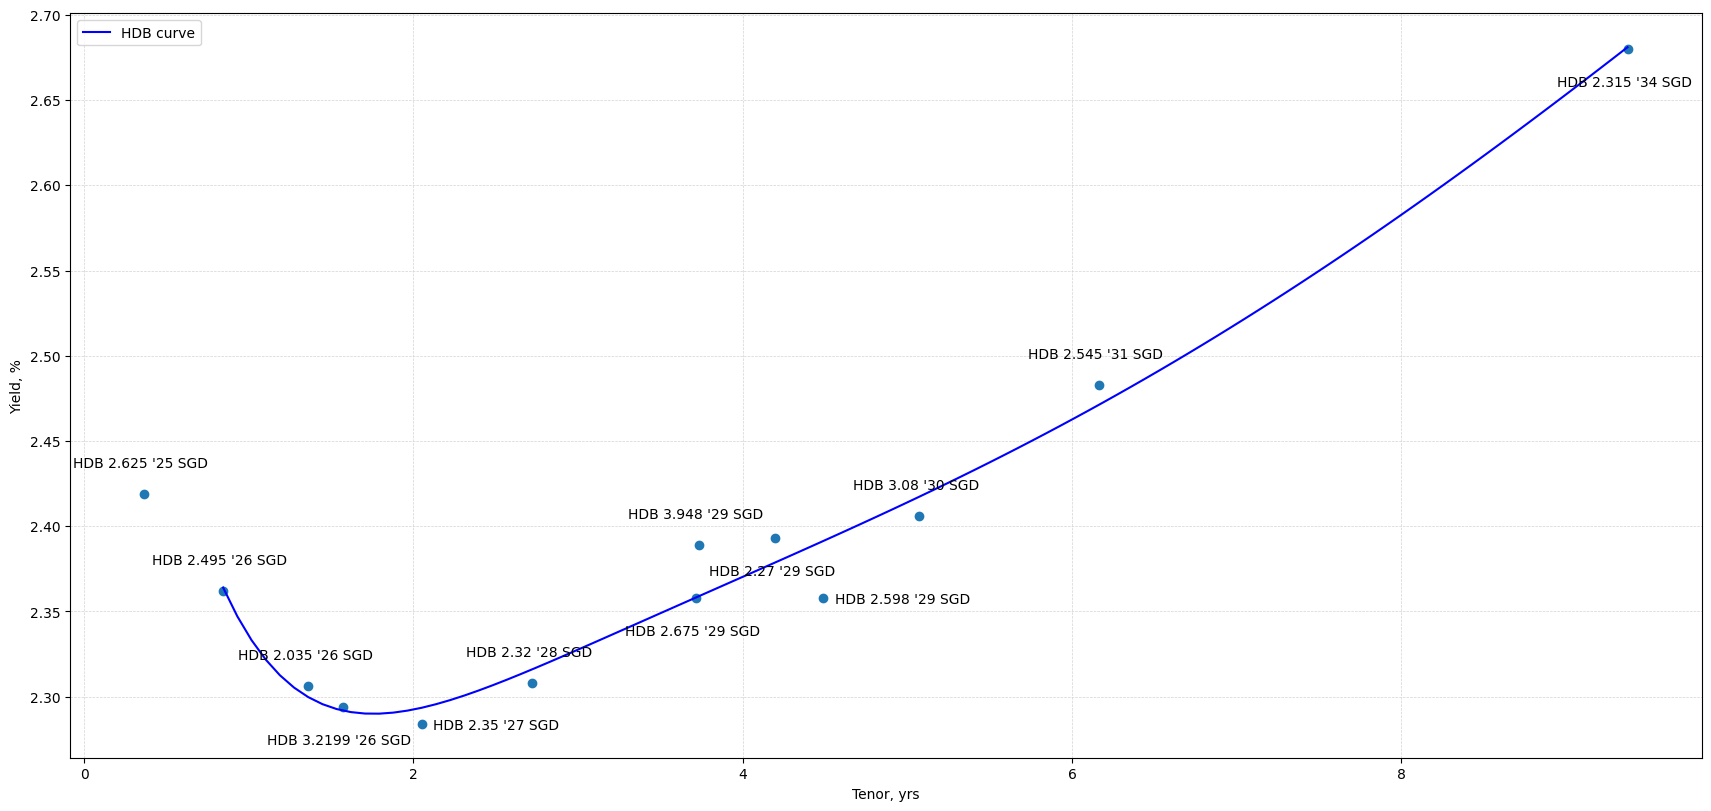

In [3]:
%matplotlib inline
hdb_port = ['SGHDB1226=','SGHDB1124=','SGHDB1123=','SGHDB1121=','SGHDB1120=','SGHDB1029=','SGHDB0934=',
'SGHDB0926=','SGHDB0925=','SGHDB0921=','SGHDB0823=','SGHDB0822A=','SGHDB0822=','SGHDB0731=',
'SGHDB0729=','SGHDB0724=','SGHDB0723=','SGHDB0721A=','SGHDB0721=','SGHDB0624=','SGHDB0530=',
'SGHDB0527=','SGHDB0524=','SGHDB0422=','SGHDB0421=','SGHDB0326=','SGHDB0323=','SGHDB0321A=',
'SGHDB0321=','SGHDB0223=','SGHDB0222=','SGHDB0129A=','SGHDB0129=','SGHDB0128=','SGHDB0123=']
 
get_data(hdb_port, height = 8, width = 17, enable_fitting = True)